In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import warnings
import dandelion as ddl
sc.logging.print_header()
warnings.filterwarnings('ignore')
os.chdir('/lustre/scratch117/cellgen/team297/kt16/Ziad/scanpy')
import scirpy as ir
import tools

scanpy==1.7.1 anndata==0.7.5 umap==0.5.1 numpy==1.19.4 scipy==1.6.0 pandas==1.2.3 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.3


In [2]:
ddl.logging.print_versions()

dandelion==0.1.1.dev47 pandas==1.2.3 numpy==1.19.4 matplotlib==3.3.4 networkx==2.5 scipy==1.6.0 skbio==0.5.6


### Check scirpy version

In [3]:
ir.__version__

'0.6.2.dev135'

### Read in the transcriptome file

In [4]:
# read in the transcriptome file
adata = sc.read_h5ad('h5ad/TNK_rna.h5ad')
adata

AnnData object with n_obs × n_vars = 107140 × 1397
    obs: 'sampleid', 'sampleid_study', 'timepoint', 'treatment', 'study_id', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'fine_clustering', 'treatment_timepoint', 'sex', 'age', 'peak_trop', 'BNP', 'on_treatment_CRP', 'AEs', 'treatment_group_1', 'treatment_group_2', 'Lymph', 'CD4', 'CD8', 'Treg', 'sample_id'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'fine_clustering_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'study_id_colors', 'timepoint_colors', 'treatment_colors', 'treatment_timepoint_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'd

### Read in TCR data with scirpy

In [5]:
# Set up the sample info
sampleInfo = pd.read_csv('../Sample_Key.csv')
sampleInfo['10x_ID'] = ['Sample_Fq'+str(x) for x in sampleInfo['10x_ID']]

In [6]:
adata_tcr_list = []
for i in range(0, len(sampleInfo['10x_ID'])):
    # read in the 10x cellranger TCR file
    adata_tcr_ = ir.io.read_10x_vdj('../raw/TCR/'+sampleInfo['10x_ID'].at[i]+'/filtered_contig_annotations.csv')    
    adata_tcr_.obs_names = [str(sampleInfo['10x_ID'].at[i])+'_'+str(j).split('-')[0] for j in adata_tcr_.obs_names]
    adata_tcr_list.append(adata_tcr_)

... storing 'extra_chains' as categorical
... storing 'IR_VJ_1_d_cigar' as categorical
... storing 'IR_VJ_2_d_cigar' as categorical
... storing 'IR_VDJ_1_d_cigar' as categorical
... storing 'IR_VDJ_2_d_cigar' as categorical
... storing 'IR_VJ_1_germline_alignment' as categorical
... storing 'IR_VJ_2_germline_alignment' as categorical
... storing 'IR_VDJ_1_germline_alignment' as categorical
... storing 'IR_VDJ_2_germline_alignment' as categorical
... storing 'IR_VJ_1_j_cigar' as categorical
... storing 'IR_VJ_2_j_cigar' as categorical
... storing 'IR_VDJ_1_j_cigar' as categorical
... storing 'IR_VDJ_2_j_cigar' as categorical
... storing 'IR_VJ_1_junction' as categorical
... storing 'IR_VJ_2_junction' as categorical
... storing 'IR_VDJ_1_junction' as categorical
... storing 'IR_VDJ_2_junction' as categorical
... storing 'IR_VJ_1_junction_aa' as categorical
... storing 'IR_VJ_2_junction_aa' as categorical
... storing 'IR_VDJ_1_junction_aa' as categorical
... storing 'IR_VDJ_2_junction_aa'

... storing 'extra_chains' as categorical
... storing 'IR_VJ_1_d_cigar' as categorical
... storing 'IR_VJ_2_d_cigar' as categorical
... storing 'IR_VDJ_1_d_cigar' as categorical
... storing 'IR_VDJ_2_d_cigar' as categorical
... storing 'IR_VJ_1_germline_alignment' as categorical
... storing 'IR_VJ_2_germline_alignment' as categorical
... storing 'IR_VDJ_1_germline_alignment' as categorical
... storing 'IR_VDJ_2_germline_alignment' as categorical
... storing 'IR_VJ_1_j_cigar' as categorical
... storing 'IR_VJ_2_j_cigar' as categorical
... storing 'IR_VDJ_1_j_cigar' as categorical
... storing 'IR_VDJ_2_j_cigar' as categorical
... storing 'IR_VJ_1_junction' as categorical
... storing 'IR_VJ_2_junction' as categorical
... storing 'IR_VDJ_1_junction' as categorical
... storing 'IR_VDJ_2_junction' as categorical
... storing 'IR_VJ_1_junction_aa' as categorical
... storing 'IR_VJ_2_junction_aa' as categorical
... storing 'IR_VDJ_1_junction_aa' as categorical
... storing 'IR_VDJ_2_junction_aa'

... storing 'IR_VJ_1_d_cigar' as categorical
... storing 'IR_VJ_2_d_cigar' as categorical
... storing 'IR_VDJ_1_d_cigar' as categorical
... storing 'IR_VDJ_2_d_cigar' as categorical
... storing 'IR_VJ_1_germline_alignment' as categorical
... storing 'IR_VJ_2_germline_alignment' as categorical
... storing 'IR_VDJ_1_germline_alignment' as categorical
... storing 'IR_VDJ_2_germline_alignment' as categorical
... storing 'IR_VJ_1_j_cigar' as categorical
... storing 'IR_VJ_2_j_cigar' as categorical
... storing 'IR_VDJ_1_j_cigar' as categorical
... storing 'IR_VDJ_2_j_cigar' as categorical
... storing 'IR_VJ_1_junction' as categorical
... storing 'IR_VJ_2_junction' as categorical
... storing 'IR_VDJ_1_junction' as categorical
... storing 'IR_VDJ_2_junction' as categorical
... storing 'IR_VJ_1_junction_aa' as categorical
... storing 'IR_VJ_2_junction_aa' as categorical
... storing 'IR_VDJ_1_junction_aa' as categorical
... storing 'IR_VDJ_2_junction_aa' as categorical
... storing 'IR_VJ_1_rev_c

... storing 'IR_VJ_2_d_cigar' as categorical
... storing 'IR_VDJ_1_d_cigar' as categorical
... storing 'IR_VDJ_2_d_cigar' as categorical
... storing 'IR_VJ_1_germline_alignment' as categorical
... storing 'IR_VJ_2_germline_alignment' as categorical
... storing 'IR_VDJ_1_germline_alignment' as categorical
... storing 'IR_VDJ_2_germline_alignment' as categorical
... storing 'IR_VJ_1_j_cigar' as categorical
... storing 'IR_VJ_2_j_cigar' as categorical
... storing 'IR_VDJ_1_j_cigar' as categorical
... storing 'IR_VDJ_2_j_cigar' as categorical
... storing 'IR_VJ_1_junction' as categorical
... storing 'IR_VJ_2_junction' as categorical
... storing 'IR_VDJ_1_junction' as categorical
... storing 'IR_VDJ_2_junction' as categorical
... storing 'IR_VJ_1_junction_aa' as categorical
... storing 'IR_VJ_2_junction_aa' as categorical
... storing 'IR_VDJ_1_junction_aa' as categorical
... storing 'IR_VDJ_2_junction_aa' as categorical
... storing 'IR_VJ_1_rev_comp' as categorical
... storing 'IR_VJ_2_rev_

... storing 'IR_VDJ_1_d_cigar' as categorical
... storing 'IR_VDJ_2_d_cigar' as categorical
... storing 'IR_VJ_1_germline_alignment' as categorical
... storing 'IR_VJ_2_germline_alignment' as categorical
... storing 'IR_VDJ_1_germline_alignment' as categorical
... storing 'IR_VDJ_2_germline_alignment' as categorical
... storing 'IR_VJ_1_j_cigar' as categorical
... storing 'IR_VJ_2_j_cigar' as categorical
... storing 'IR_VDJ_1_j_cigar' as categorical
... storing 'IR_VDJ_2_j_cigar' as categorical
... storing 'IR_VJ_1_junction' as categorical
... storing 'IR_VJ_2_junction' as categorical
... storing 'IR_VDJ_1_junction' as categorical
... storing 'IR_VDJ_2_junction' as categorical
... storing 'IR_VJ_1_junction_aa' as categorical
... storing 'IR_VJ_2_junction_aa' as categorical
... storing 'IR_VDJ_1_junction_aa' as categorical
... storing 'IR_VDJ_2_junction_aa' as categorical
... storing 'IR_VJ_1_rev_comp' as categorical
... storing 'IR_VJ_2_rev_comp' as categorical
... storing 'IR_VDJ_1_re

... storing 'IR_VDJ_2_d_cigar' as categorical
... storing 'IR_VJ_1_germline_alignment' as categorical
... storing 'IR_VJ_2_germline_alignment' as categorical
... storing 'IR_VDJ_1_germline_alignment' as categorical
... storing 'IR_VDJ_2_germline_alignment' as categorical
... storing 'IR_VJ_1_j_cigar' as categorical
... storing 'IR_VJ_2_j_cigar' as categorical
... storing 'IR_VDJ_1_j_cigar' as categorical
... storing 'IR_VDJ_2_j_cigar' as categorical
... storing 'IR_VJ_1_junction' as categorical
... storing 'IR_VJ_2_junction' as categorical
... storing 'IR_VDJ_1_junction' as categorical
... storing 'IR_VDJ_2_junction' as categorical
... storing 'IR_VJ_1_junction_aa' as categorical
... storing 'IR_VJ_2_junction_aa' as categorical
... storing 'IR_VDJ_1_junction_aa' as categorical
... storing 'IR_VDJ_2_junction_aa' as categorical
... storing 'IR_VJ_1_rev_comp' as categorical
... storing 'IR_VJ_2_rev_comp' as categorical
... storing 'IR_VDJ_1_rev_comp' as categorical
... storing 'IR_VDJ_2_r

... storing 'IR_VJ_1_germline_alignment' as categorical
... storing 'IR_VJ_2_germline_alignment' as categorical
... storing 'IR_VDJ_1_germline_alignment' as categorical
... storing 'IR_VDJ_2_germline_alignment' as categorical
... storing 'IR_VJ_1_j_cigar' as categorical
... storing 'IR_VJ_2_j_cigar' as categorical
... storing 'IR_VDJ_1_j_cigar' as categorical
... storing 'IR_VDJ_2_j_cigar' as categorical
... storing 'IR_VJ_1_junction' as categorical
... storing 'IR_VJ_2_junction' as categorical
... storing 'IR_VDJ_1_junction' as categorical
... storing 'IR_VDJ_2_junction' as categorical
... storing 'IR_VJ_1_junction_aa' as categorical
... storing 'IR_VJ_2_junction_aa' as categorical
... storing 'IR_VDJ_1_junction_aa' as categorical
... storing 'IR_VDJ_2_junction_aa' as categorical
... storing 'IR_VJ_1_rev_comp' as categorical
... storing 'IR_VJ_2_rev_comp' as categorical
... storing 'IR_VDJ_1_rev_comp' as categorical
... storing 'IR_VDJ_2_rev_comp' as categorical
... storing 'IR_VJ_1_s

... storing 'IR_VJ_2_germline_alignment' as categorical
... storing 'IR_VDJ_1_germline_alignment' as categorical
... storing 'IR_VDJ_2_germline_alignment' as categorical
... storing 'IR_VJ_1_j_cigar' as categorical
... storing 'IR_VJ_2_j_cigar' as categorical
... storing 'IR_VDJ_1_j_cigar' as categorical
... storing 'IR_VDJ_2_j_cigar' as categorical
... storing 'IR_VJ_1_junction' as categorical
... storing 'IR_VJ_2_junction' as categorical
... storing 'IR_VDJ_1_junction' as categorical
... storing 'IR_VDJ_2_junction' as categorical
... storing 'IR_VJ_1_junction_aa' as categorical
... storing 'IR_VJ_2_junction_aa' as categorical
... storing 'IR_VDJ_1_junction_aa' as categorical
... storing 'IR_VDJ_2_junction_aa' as categorical
... storing 'IR_VJ_1_rev_comp' as categorical
... storing 'IR_VJ_2_rev_comp' as categorical
... storing 'IR_VDJ_1_rev_comp' as categorical
... storing 'IR_VDJ_2_rev_comp' as categorical
... storing 'IR_VJ_1_sequence' as categorical
... storing 'IR_VJ_2_sequence' a

In [7]:
import anndata as ad
# concatenate
adata_tcr = ad.concat(adata_tcr_list)
adata_tcr

AnnData object with n_obs × n_vars = 92941 × 0
    obs: 'multi_chain', 'extra_chains', 'is_cell', 'high_confidence', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_d_cigar', 'IR_VJ_2_d_cigar', 'IR_VDJ_1_d_cigar', 'IR_VDJ_2_d_cigar', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_germline_alignment', 'IR_VJ_2_germline_alignment', 'IR_VDJ_1_germline_alignment', 'IR_VDJ_2_germline_alignment', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_j_cigar', 'IR_VJ_2_j_cigar', 'IR_VDJ_1_j_cigar', 'IR_VDJ_2_j_cigar', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_j

In [8]:
ir.tl.chain_qc(adata_tcr)
adata_tcr

AnnData object with n_obs × n_vars = 92941 × 0
    obs: 'multi_chain', 'extra_chains', 'is_cell', 'high_confidence', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_d_cigar', 'IR_VJ_2_d_cigar', 'IR_VDJ_1_d_cigar', 'IR_VDJ_2_d_cigar', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_germline_alignment', 'IR_VJ_2_germline_alignment', 'IR_VDJ_1_germline_alignment', 'IR_VDJ_2_germline_alignment', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_j_cigar', 'IR_VJ_2_j_cigar', 'IR_VDJ_1_j_cigar', 'IR_VDJ_2_j_cigar', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_j

... storing 'extra_chains' as categorical
... storing 'IR_VJ_1_j_call' as categorical
... storing 'IR_VJ_2_j_call' as categorical
... storing 'IR_VDJ_2_j_call' as categorical
... storing 'IR_VJ_1_junction' as categorical
... storing 'IR_VJ_2_junction' as categorical
... storing 'IR_VDJ_1_junction' as categorical
... storing 'IR_VDJ_2_junction' as categorical
... storing 'IR_VJ_1_junction_aa' as categorical
... storing 'IR_VJ_2_junction_aa' as categorical
... storing 'IR_VDJ_1_junction_aa' as categorical
... storing 'IR_VDJ_2_junction_aa' as categorical
... storing 'IR_VJ_1_v_call' as categorical
... storing 'IR_VJ_2_v_call' as categorical
... storing 'IR_VDJ_1_v_call' as categorical
... storing 'IR_VDJ_2_v_call' as categorical
... storing 'receptor_type' as categorical
... storing 'receptor_subtype' as categorical
... storing 'chain_pairing' as categorical


<AxesSubplot:title={'center':'Number of cells in receptor_subtype by has_ir'}, xlabel='receptor_subtype', ylabel='Number of cells'>

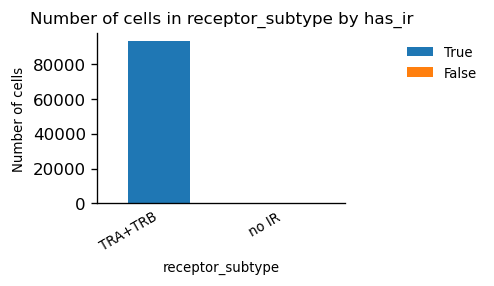

In [9]:
ir.pl.group_abundance(adata_tcr, groupby="receptor_subtype")

In [10]:
adata_tcr = adata_tcr[adata_tcr.obs["multi_chain"] != "True", :].copy()

### Merge with gene expression data

In [11]:
# merge with gene expression data
ir.pp.merge_with_tcr(adata, adata_tcr)
adata

AnnData object with n_obs × n_vars = 107140 × 1397
    obs: 'sampleid', 'sampleid_study', 'timepoint', 'treatment', 'study_id', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'fine_clustering', 'treatment_timepoint', 'sex', 'age', 'peak_trop', 'BNP', 'on_treatment_CRP', 'AEs', 'treatment_group_1', 'treatment_group_2', 'Lymph', 'CD4', 'CD8', 'Treg', 'sample_id', 'multi_chain', 'extra_chains', 'is_cell', 'high_confidence', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_d_cigar', 'IR_VJ_2_d_cigar', 'IR_VDJ_1_d_cigar', 'IR_VDJ_2_d_cigar', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_V

In [12]:
adata.obs['has_ir'].value_counts()

True     66129
False    41011
Name: has_ir, dtype: int64

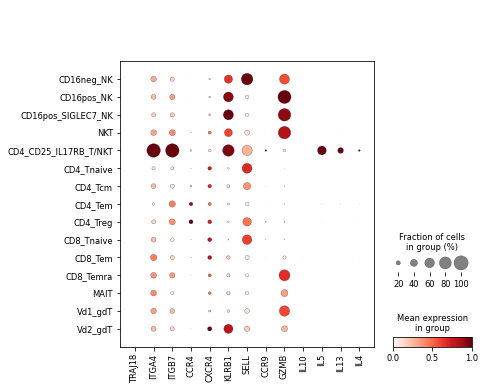

In [13]:
sc.pl.dotplot(adata, ['TRAJ18', 'ITGA4', 'ITGB7', 'CCR4', 'CXCR4', 'KLRB1', 'SELL', 'CCR9', 'GZMB', 'IL10', 'IL5', 'IL13', 'IL4'], groupby = 'fine_clustering', standard_scale = 'var')

In [14]:
adata[adata.obs['fine_clustering'] == 'CD4_CD25_IL17RB_T/NKT'].obs[['IR_VJ_1_v_call', 'IR_VJ_1_j_call', 'IR_VDJ_1_v_call', 'IR_VDJ_1_j_call']]

,IR_VJ_1_v_call,IR_VJ_1_j_call,IR_VDJ_1_v_call,IR_VDJ_1_j_call
Sample_Fq4_TGAGCCGCAACTGCTA,TRAV6,TRAJ13,TRBV18,TRBJ2-1
Sample_Fq18_AACTGGTCAGGCGATA,TRAV8-6,TRAJ22,TRBV27,TRBJ2-3
Sample_Fq18_AACTTTCGTAGTACCT,TRAV19,TRAJ53,nan,NaN
Sample_Fq18_AAGTCTGCACCGGAAA,TRAV20,TRAJ34,nan,NaN
Sample_Fq18_CACACCTTCATCGATG,TRAV5,TRAJ41,TRBV5-1,TRBJ2-7
Sample_Fq18_CCATGTCGTGCCTGTG,TRAV13-2,TRAJ6,TRBV6-1,TRBJ2-2
Sample_Fq18_CGTCACTGTGTTCTTT,TRAV17,TRAJ52,TRBV11-2,TRBJ2-7
Sample_Fq18_CTCGTACCATAAGACA,TRAV29/DV5,TRAJ15,TRBV28,TRBJ1-2
Sample_Fq18_GATCAGTGTTCATGGT,TRAV8-4,TRAJ29,TRBV6-1,TRBJ1-3
Sample_Fq18_GCGACCATCTCTGTCG,NaN,NaN,NaN,NaN
